In [2]:
import pandas as pd
import numpy as np

In [3]:
print (None or True,
    None or False,
    None == None,
    None is None,
    type(None), sep ='\n'
)

True
False
True
True
<class 'NoneType'>


NUMPY

In [4]:
print (np.nan or True,
    np.nan == None,
    np.nan is np.nan,
    type(np.nan), sep ='\n'
)

nan
False
True
<class 'float'>


PANDAS

In [5]:
pruebas_faltantes = pd.DataFrame.from_dict({'x': [0,1,np.nan, np.nan,None],
                                            'y': [0,1,pd.NA, np.nan,None]})

In [6]:
pruebas_faltantes.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [7]:
pd.Series([pd.to_datetime('2022-01-01'),np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [8]:
%pip install pyjanitor missingno pyreader session_info UpSetPlot

In [9]:
import sys
print(sys.path)

['/Users/pablogarcia/Documents/EIA/SÉPTIMO/DATOS/PYTHON1', '/Applications/anaconda3/lib/python312.zip', '/Applications/anaconda3/lib/python3.12', '/Applications/anaconda3/lib/python3.12/lib-dynload', '', '/Applications/anaconda3/lib/python3.12/site-packages', '/Applications/anaconda3/lib/python3.12/site-packages/aeosa']


In [10]:
sys.path.append('/Applications/anaconda3/lib/python3.12/site-packages')

In [11]:
import warnings
warnings.filterwarnings('ignore')
import janitor
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import pyreadr
import session_info
import numpy as np
import seaborn as sb
import upsetplot

In [12]:
#Extension de pandas para datos nulos
%run pandas-missing-extension.ipynb

In [13]:
resultado = pyreadr.read_r('riskfactors.rda')
datos_riesgo = resultado['riskfactors']
datos_riesgo.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


RESÚMENES BÁSICOS

In [14]:
#Tamano general del conunto de datos
datos_riesgo.shape

(245, 34)

In [15]:
#Número de registros completo
datos_riesgo.missing.number_complete()

7144

In [16]:
datos_riesgo.missing.missing_variable_summary()#me muestra la cantidad de datos por variable

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [17]:
#cantidad de registros con respecto a las variables nulas
datos_riesgo.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


Visualización de datos faktantes


/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/Applications/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


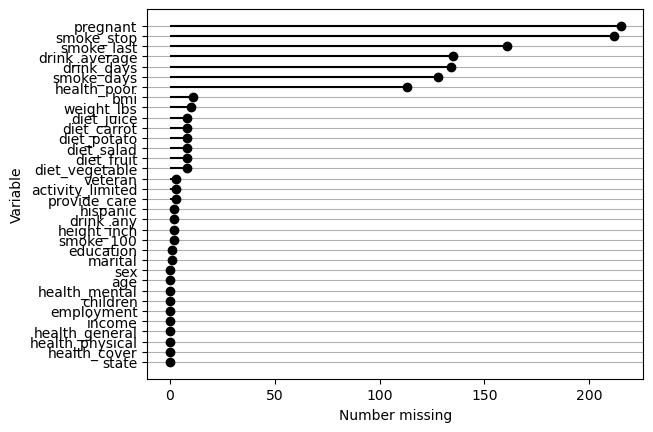

In [18]:
#la relación de variables a partir del impacto (cantidad) de registros nulos
datos_riesgo.missing.missing_variable_plot()

<Axes: >

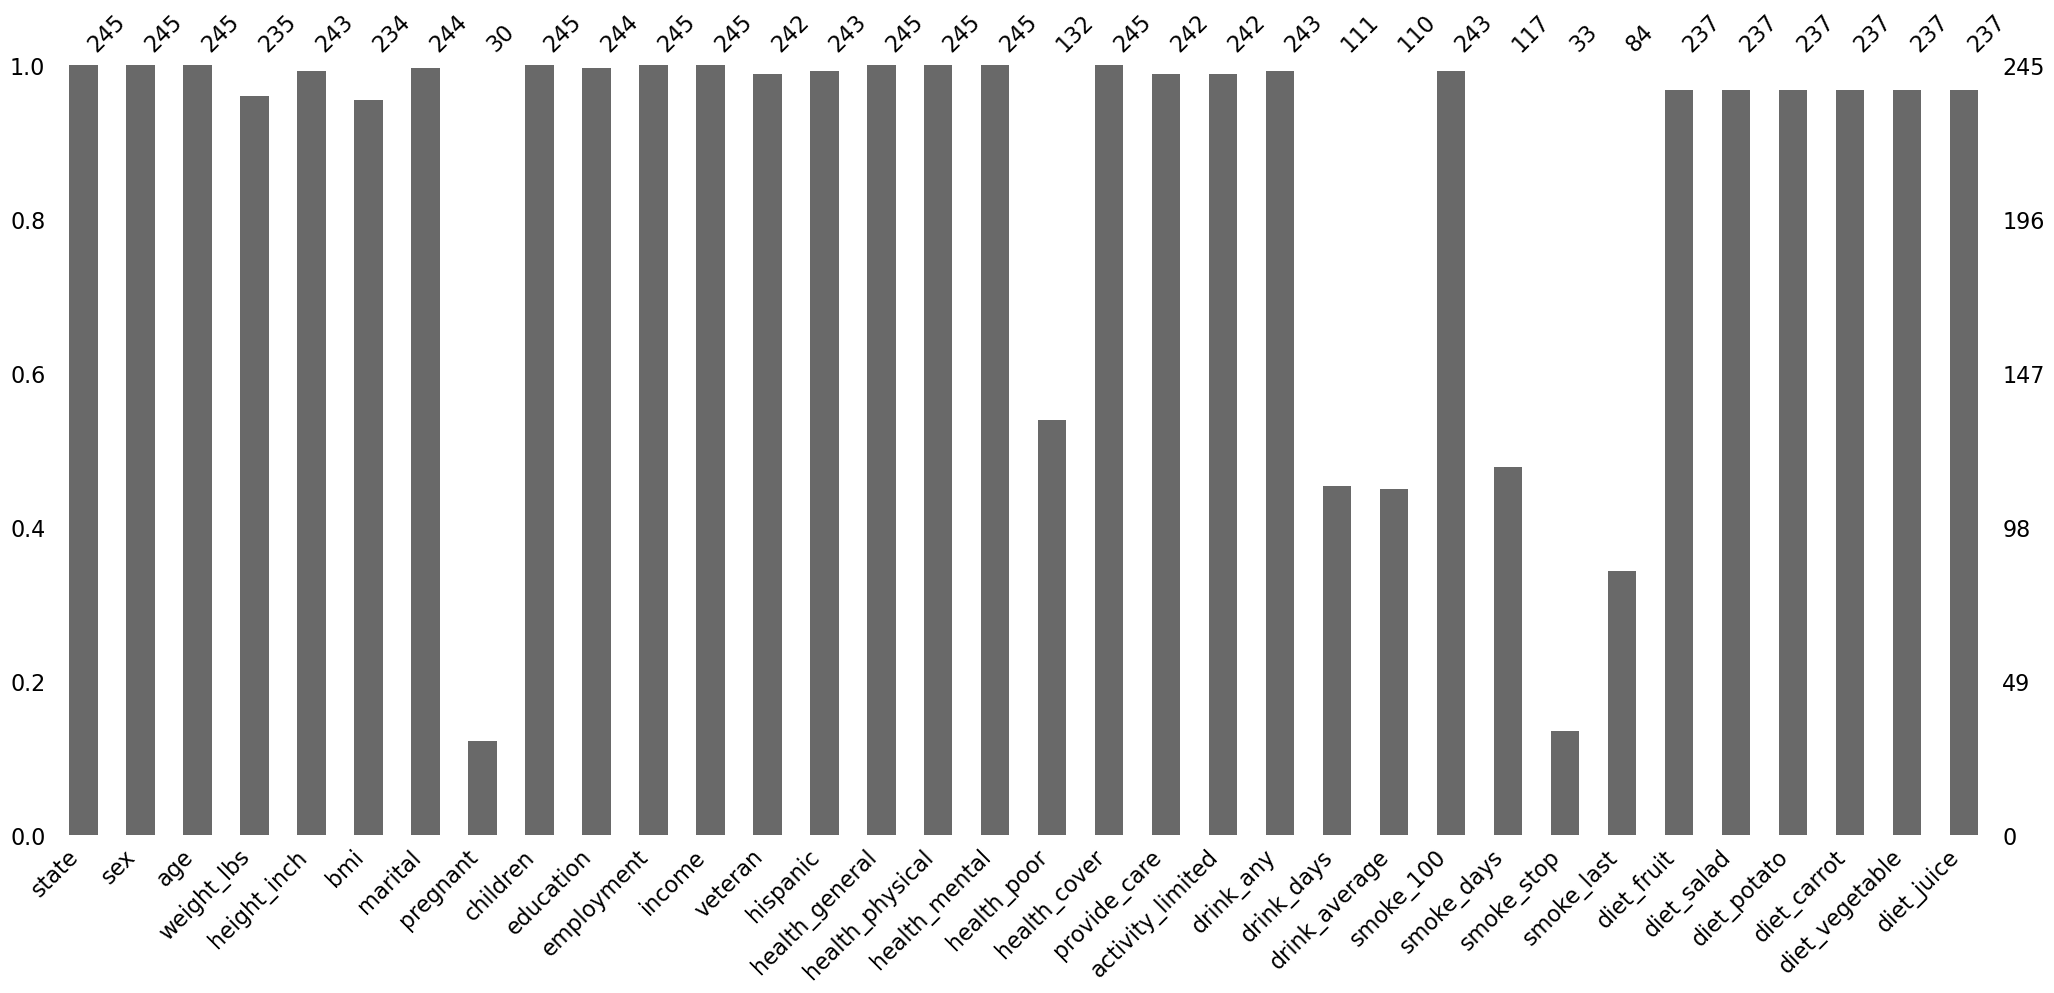

In [19]:
msno.bar(df = datos_riesgo)

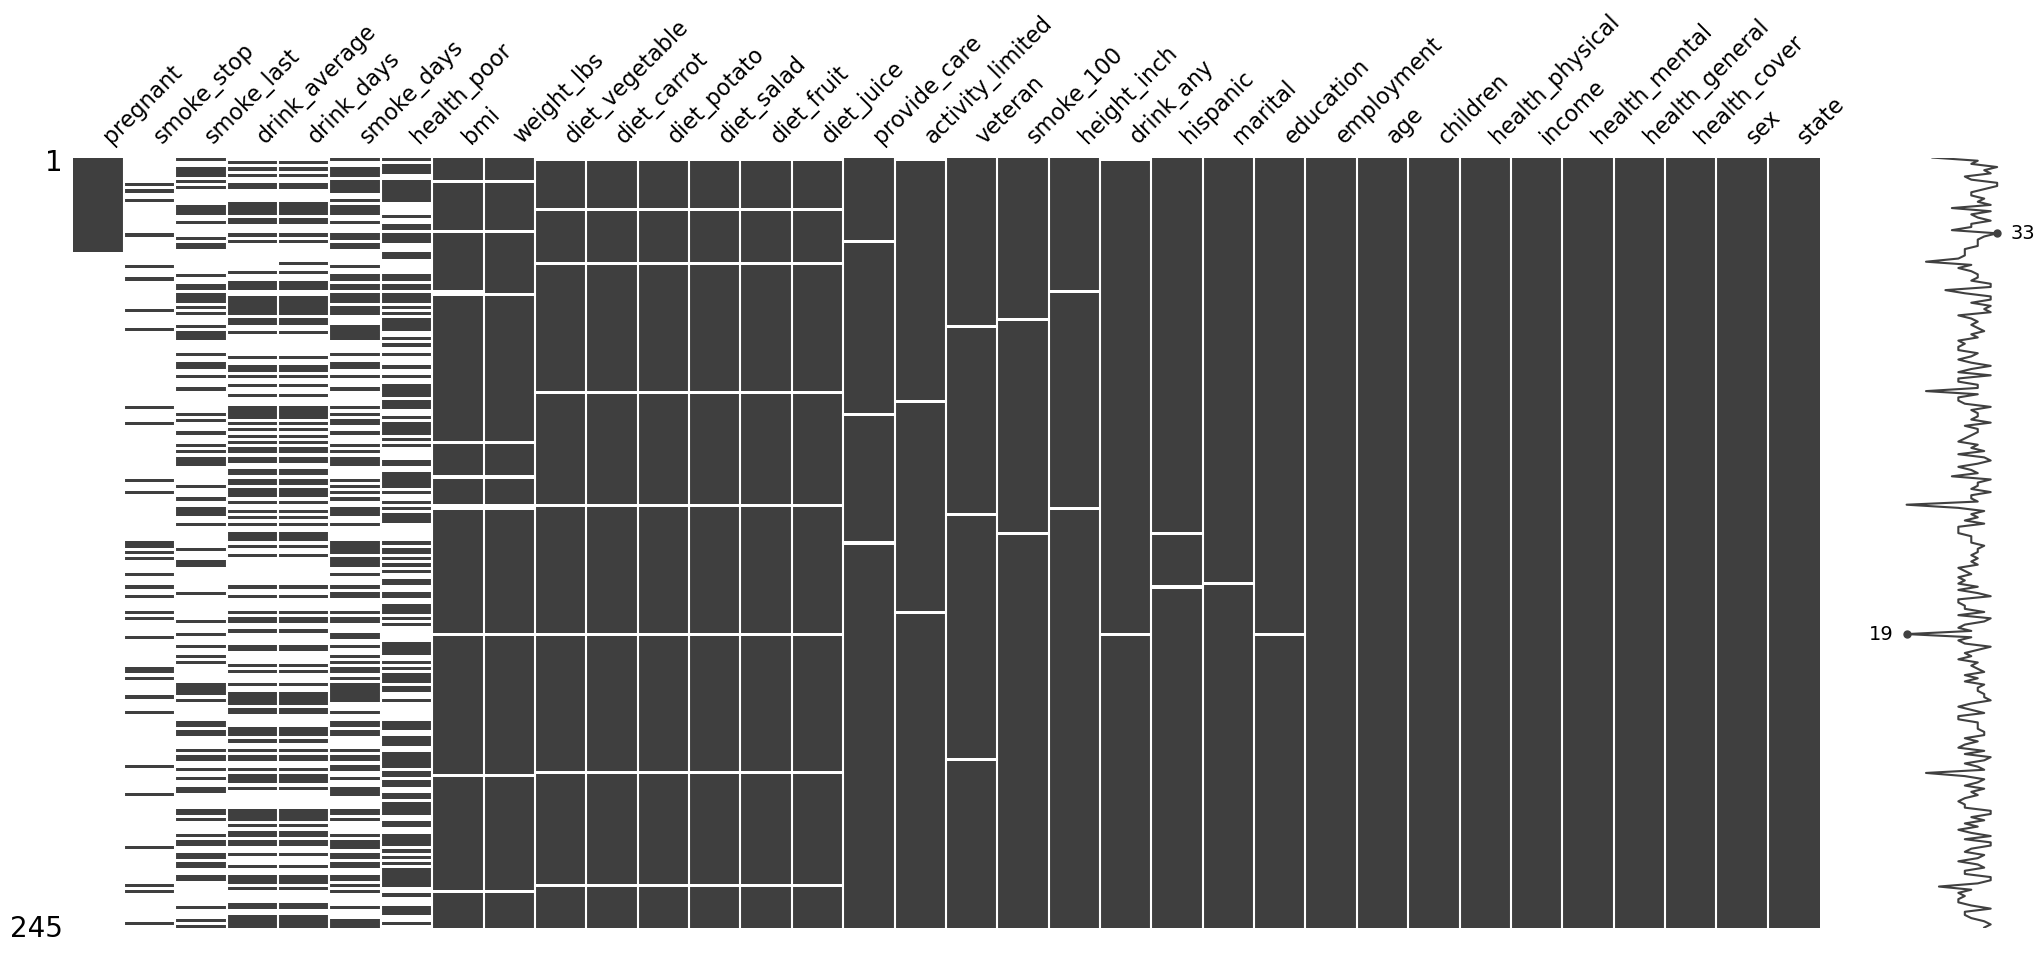

In [20]:
datos_riesgo.missing.sort_variables_by_missingness().sort_values(by = 'pregnant').pipe(msno.matrix)
plt.show()

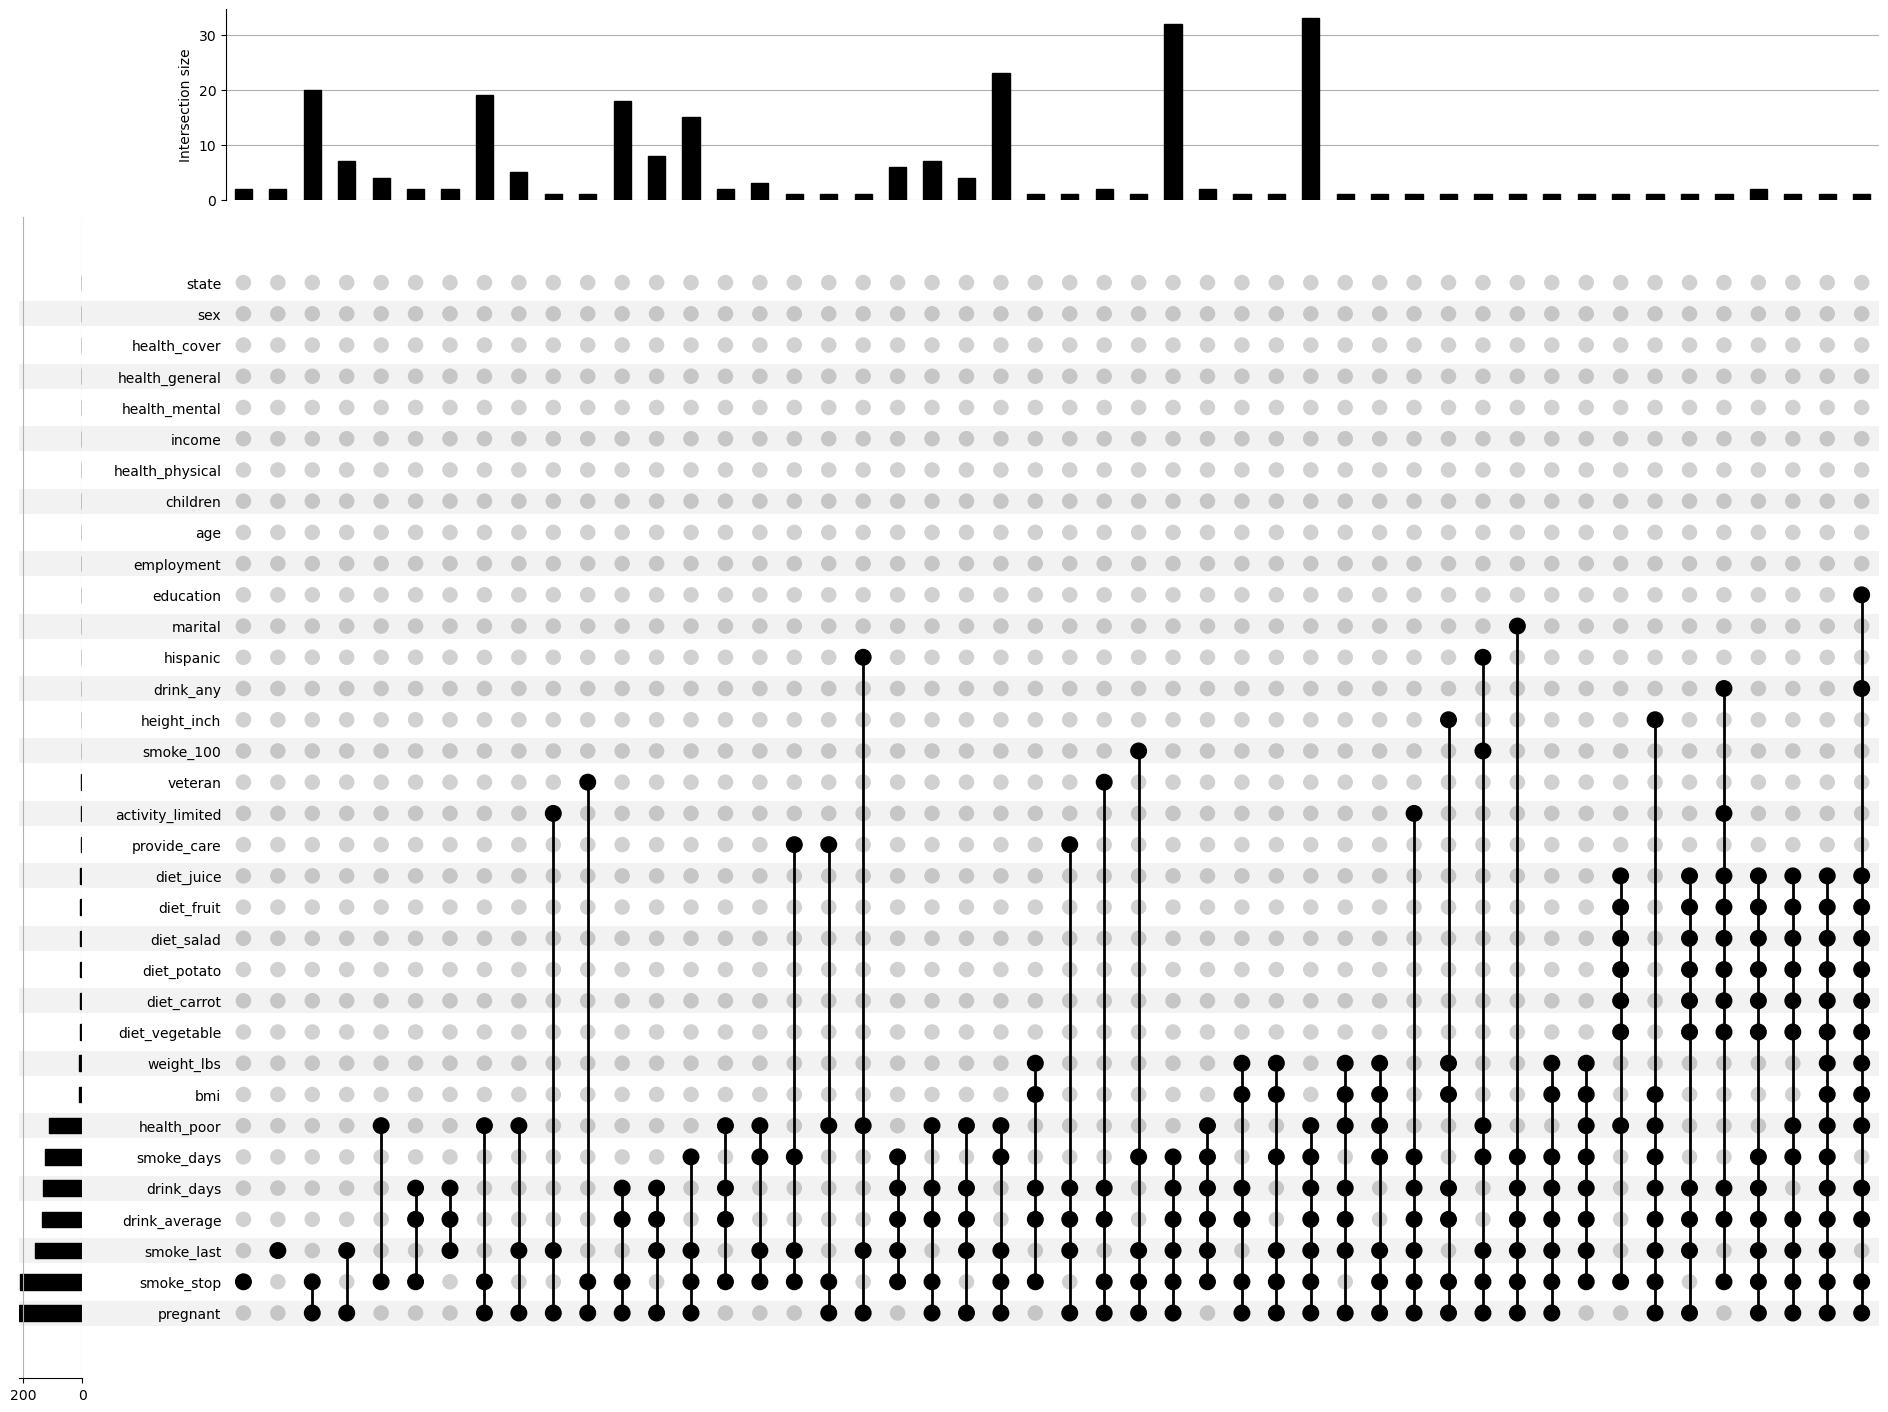

In [21]:
datos_riesgo.missing.missing_upsetplot(variables=None)
plt.show()

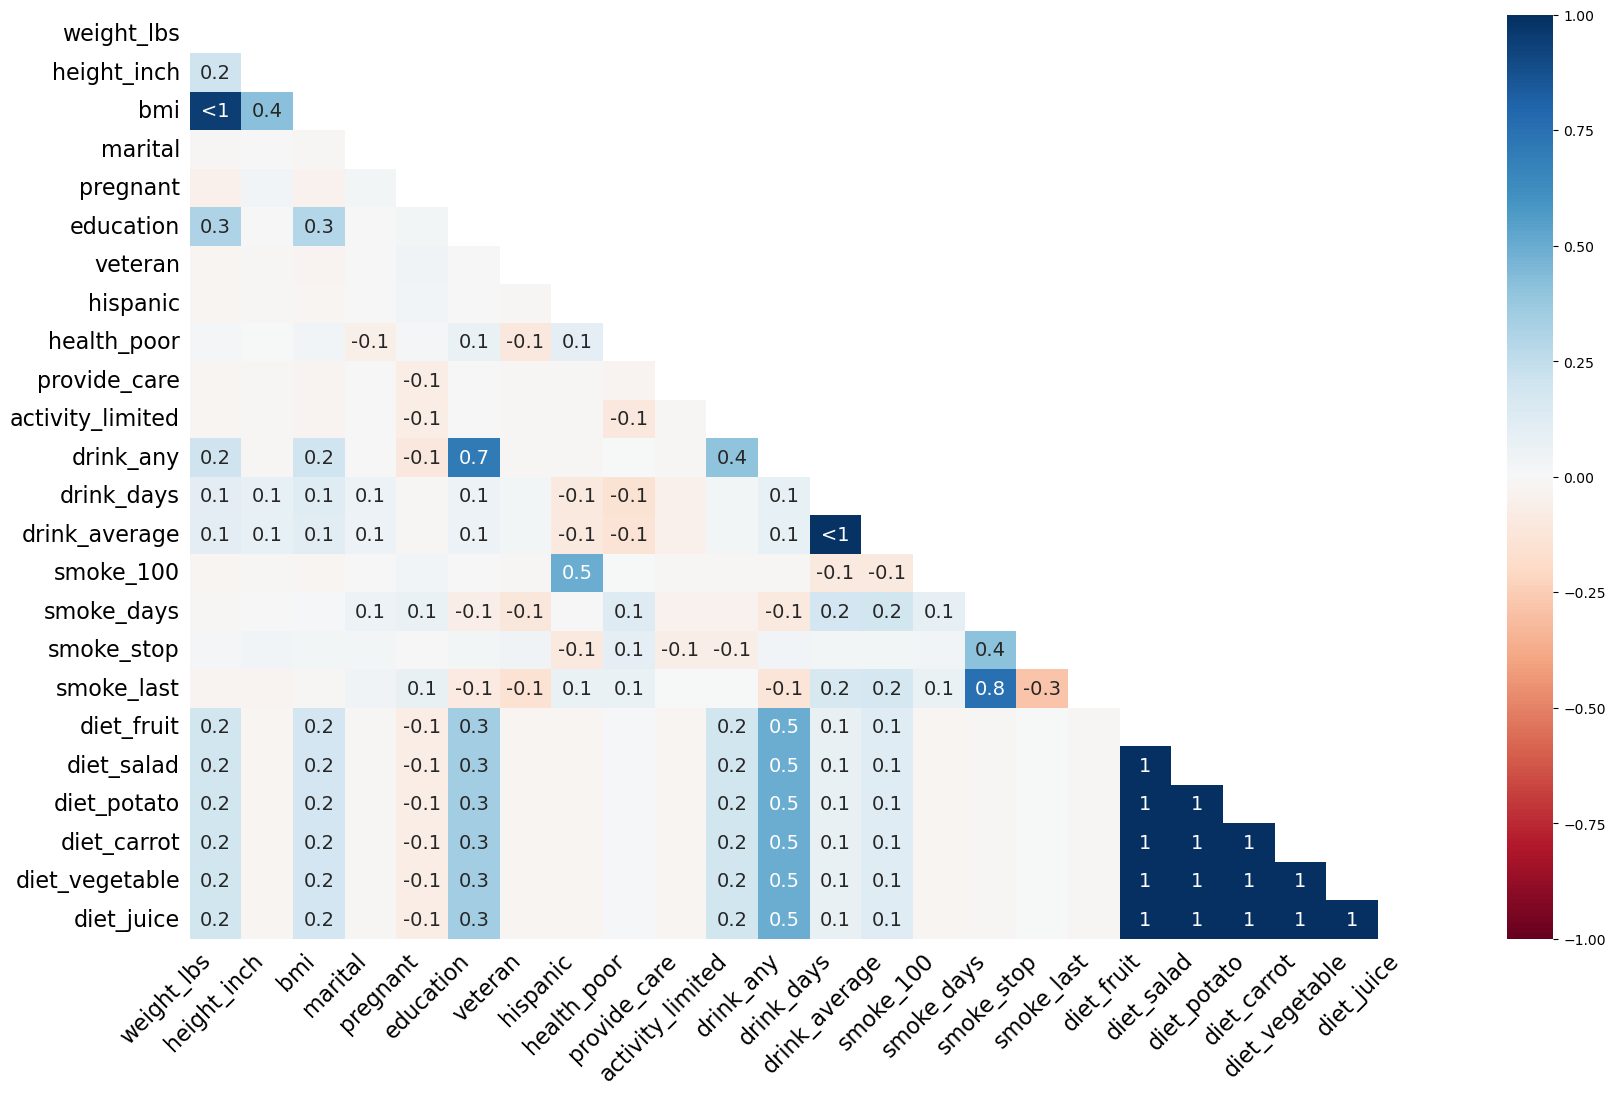

In [22]:
msno.heatmap(datos_riesgo)
plt.show()

Datos nulos implícitos

In [23]:
datos_implicitos = pd.DataFrame.from_dict(data={'name': ['Lynn', 'Lynn', 'Lynn', 'Zelda'],
                                                'time': ['morning', 'afternoon', 'night', 'morning'],
                                                'value':[350, 310, np.nan, 320]})
datos_implicitos

,name,time,value
0,Lynn,morning,350.0
1,Lynn,afternoon,310.0
2,Lynn,night,NaN
3,Zelda,morning,320.0


Pivotar la tabla

In [24]:
datos_implicitos.pivot_wider(index='name', names_from='time', values_from='value')

,name,afternoon,morning,night
0,Lynn,310.0,350.0,NaN
1,Zelda,NaN,320.0,NaN


In [25]:
datos_implicitos.complete('name','time')

,name,time,value
0,Lynn,afternoon,310.0
1,Lynn,morning,350.0
2,Lynn,night,NaN
3,Zelda,afternoon,NaN
4,Zelda,morning,320.0
5,Zelda,night,NaN


Identificación de tipos de datos nulos


In [26]:
names=["pregnancies", "glucose", "blood_preasure", "skin_thickness", "insulin", "bmi", "diabetes_pedigree_function", "age", "outcome"]
datos = pd.read_csv('pima-indians-diabetes.csv', names=names)
datos.head()

,pregnancies,glucose,blood_preasure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


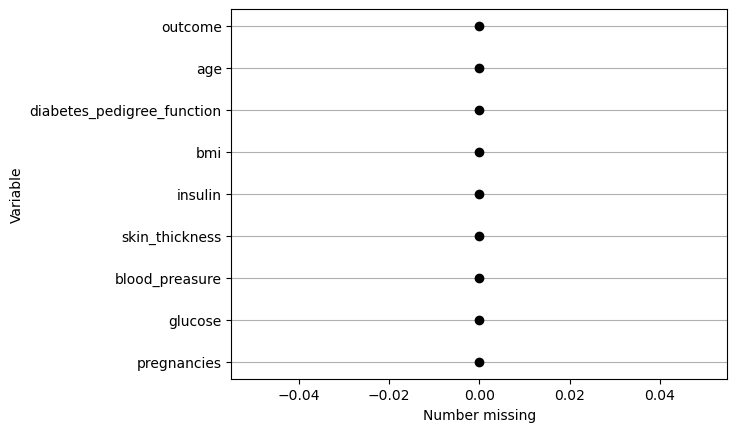

In [27]:
datos.missing.missing_variable_plot()

In [28]:
datos.describe()

,pregnancies,glucose,blood_preasure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


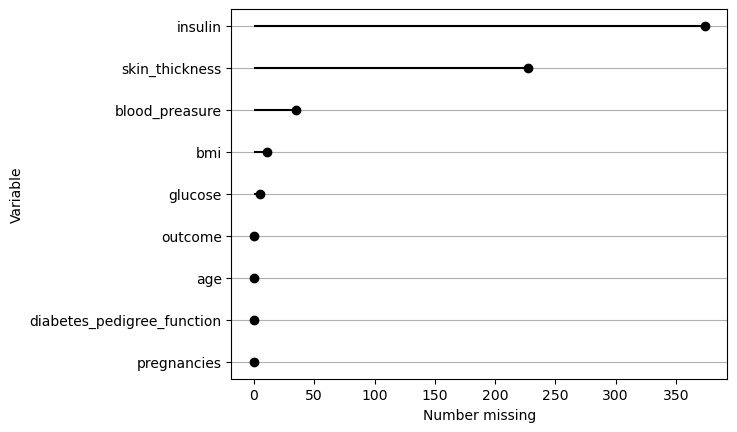

In [29]:
datos[datos.columns[1:6]]=datos[datos.columns[1:6]].replace(0, np.nan)
datos.missing.missing_variable_plot()

MCAR (MISSING COMPLETE AT RANDOM)

In [30]:
datos.missing.sort_variables_by_missingness()

,insulin,skin_thickness,blood_preasure,bmi,glucose,pregnancies,diabetes_pedigree_function,age,outcome
0,NaN,35.0,72.0,33.6,148.0,6,0.627,50,1
1,NaN,29.0,66.0,26.6,85.0,1,0.351,31,0
2,NaN,NaN,64.0,23.3,183.0,8,0.672,32,1
3,94.0,23.0,66.0,28.1,89.0,1,0.167,21,0
4,168.0,35.0,40.0,43.1,137.0,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,180.0,48.0,76.0,32.9,101.0,10,0.171,63,0
764,NaN,27.0,70.0,36.8,122.0,2,0.340,27,0
765,112.0,23.0,72.0,26.2,121.0,5,0.245,30,0
766,NaN,NaN,60.0,30.1,126.0,1,0.349,47,1


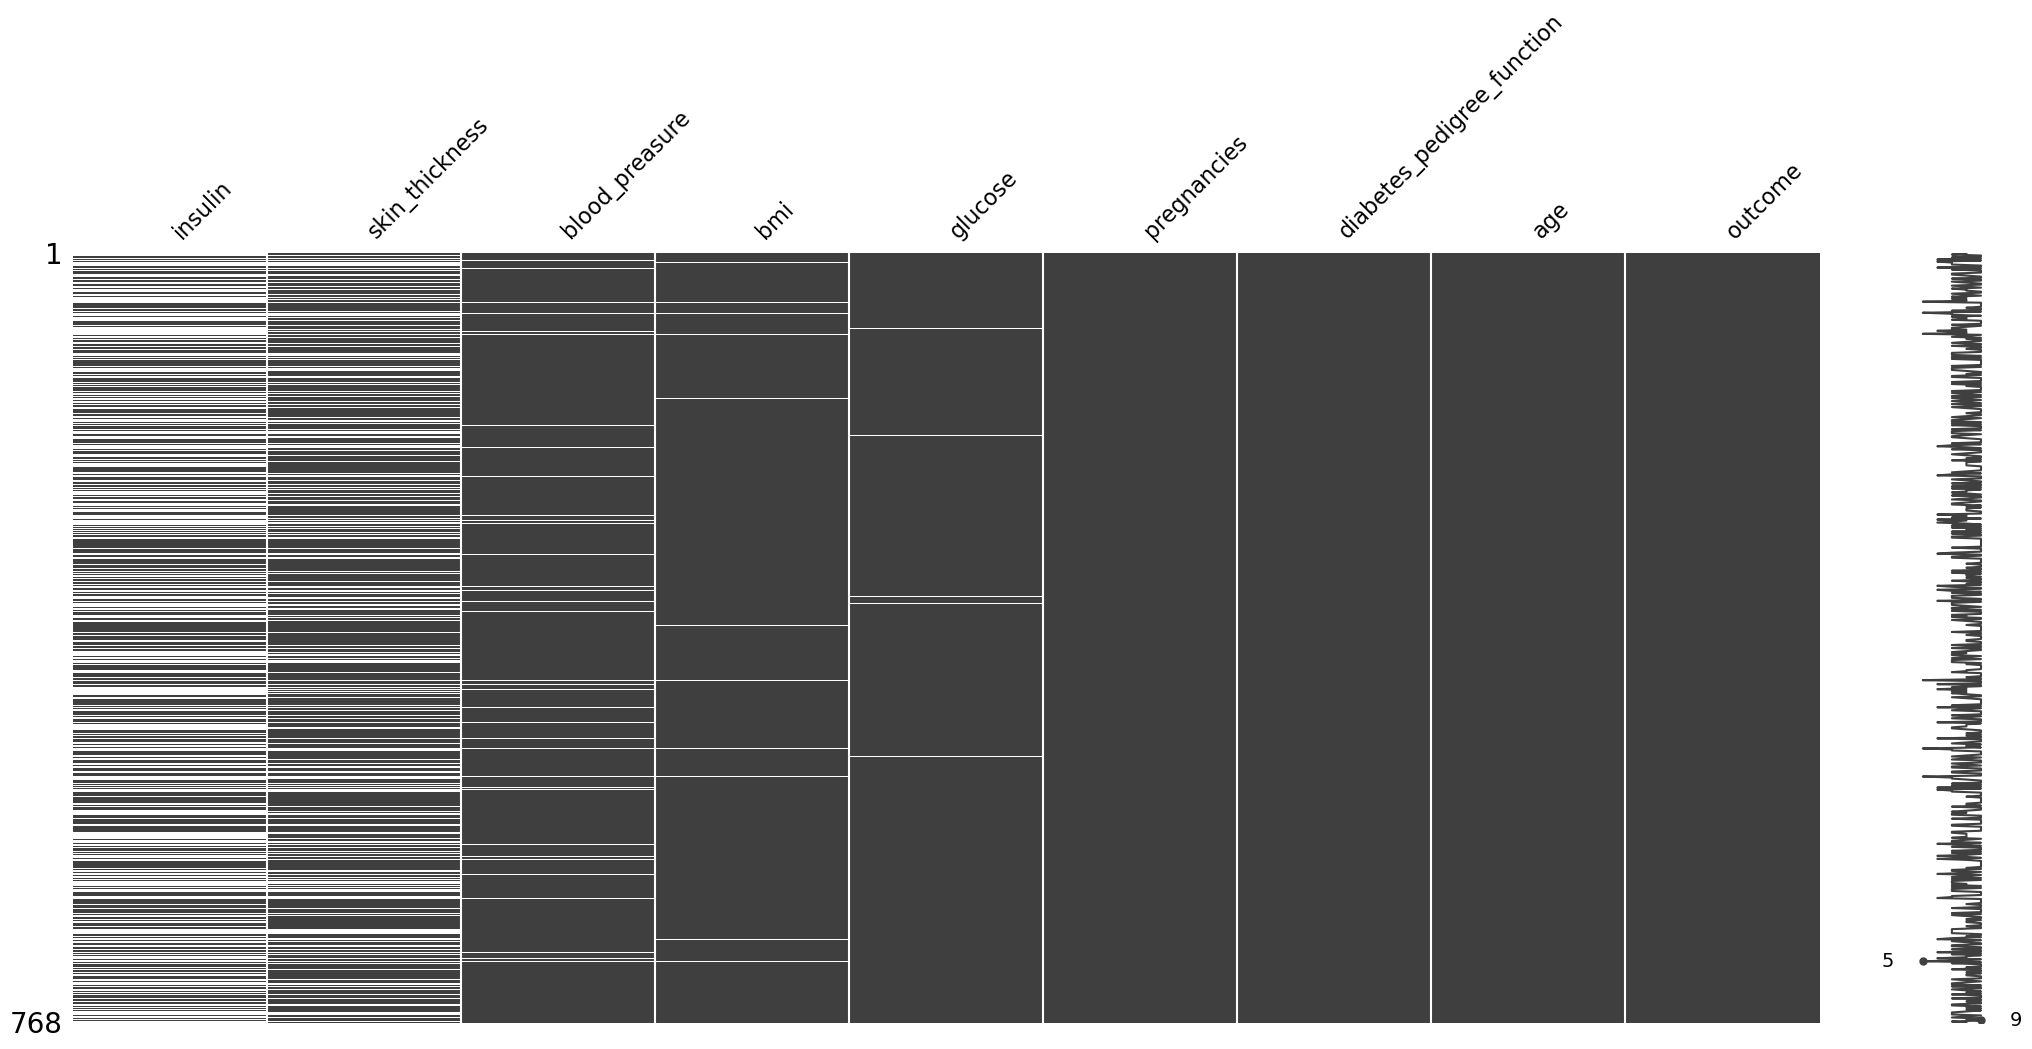

In [31]:
datos.missing.sort_variables_by_missingness().pipe(msno.matrix)
plt.show()

#datos_riesgo.missing.sort_variables_by_missingness().sort_values(by = 'pregnant').pipe(msno.matrix)
#plt.show()

In [37]:
from scipy.stats import chi2
def little_mcar_test(data, alpha = 0.05):
    data = pd.DataFrame(data)
    data.columns = ['x'+str(i) for i in range(data.shape[1])]
    data['missing'] = np.sum(data.isnull(), axis = 1)
    n = data.shape[0]
    k = data.shape[1]
    df = k*(k-1)/2
    chi2_crit = chi2.ppf(1-alpha, df)
    chi2_val = ((n-1-(k-1)/2)**2)/(k-1)/((n-k)*np.mean(data['missing']))
    p_val = 1-chi2.cdf(chi2_val, df)
    if chi2_val > chi2_crit:
        print('Se rechaza la hipótesis nula: Los datos no son MCAR (p-value = (:.4f),chi2 = {:.4f})'.format(p_val, chi2_val))
    else:
        print('No se rechaza la hipótesis nula: Los datos son MCAR (p-value = (:.4f),chi2 = {:.4f})'.format(p_val, chi2_val))

In [38]:
little_mcar_test(datos)

Se rechaza la hipótesis nula: Los datos no son MCAR (p-value = (:.4f),chi2 = 0.0000)


MAR (Missing at Random)

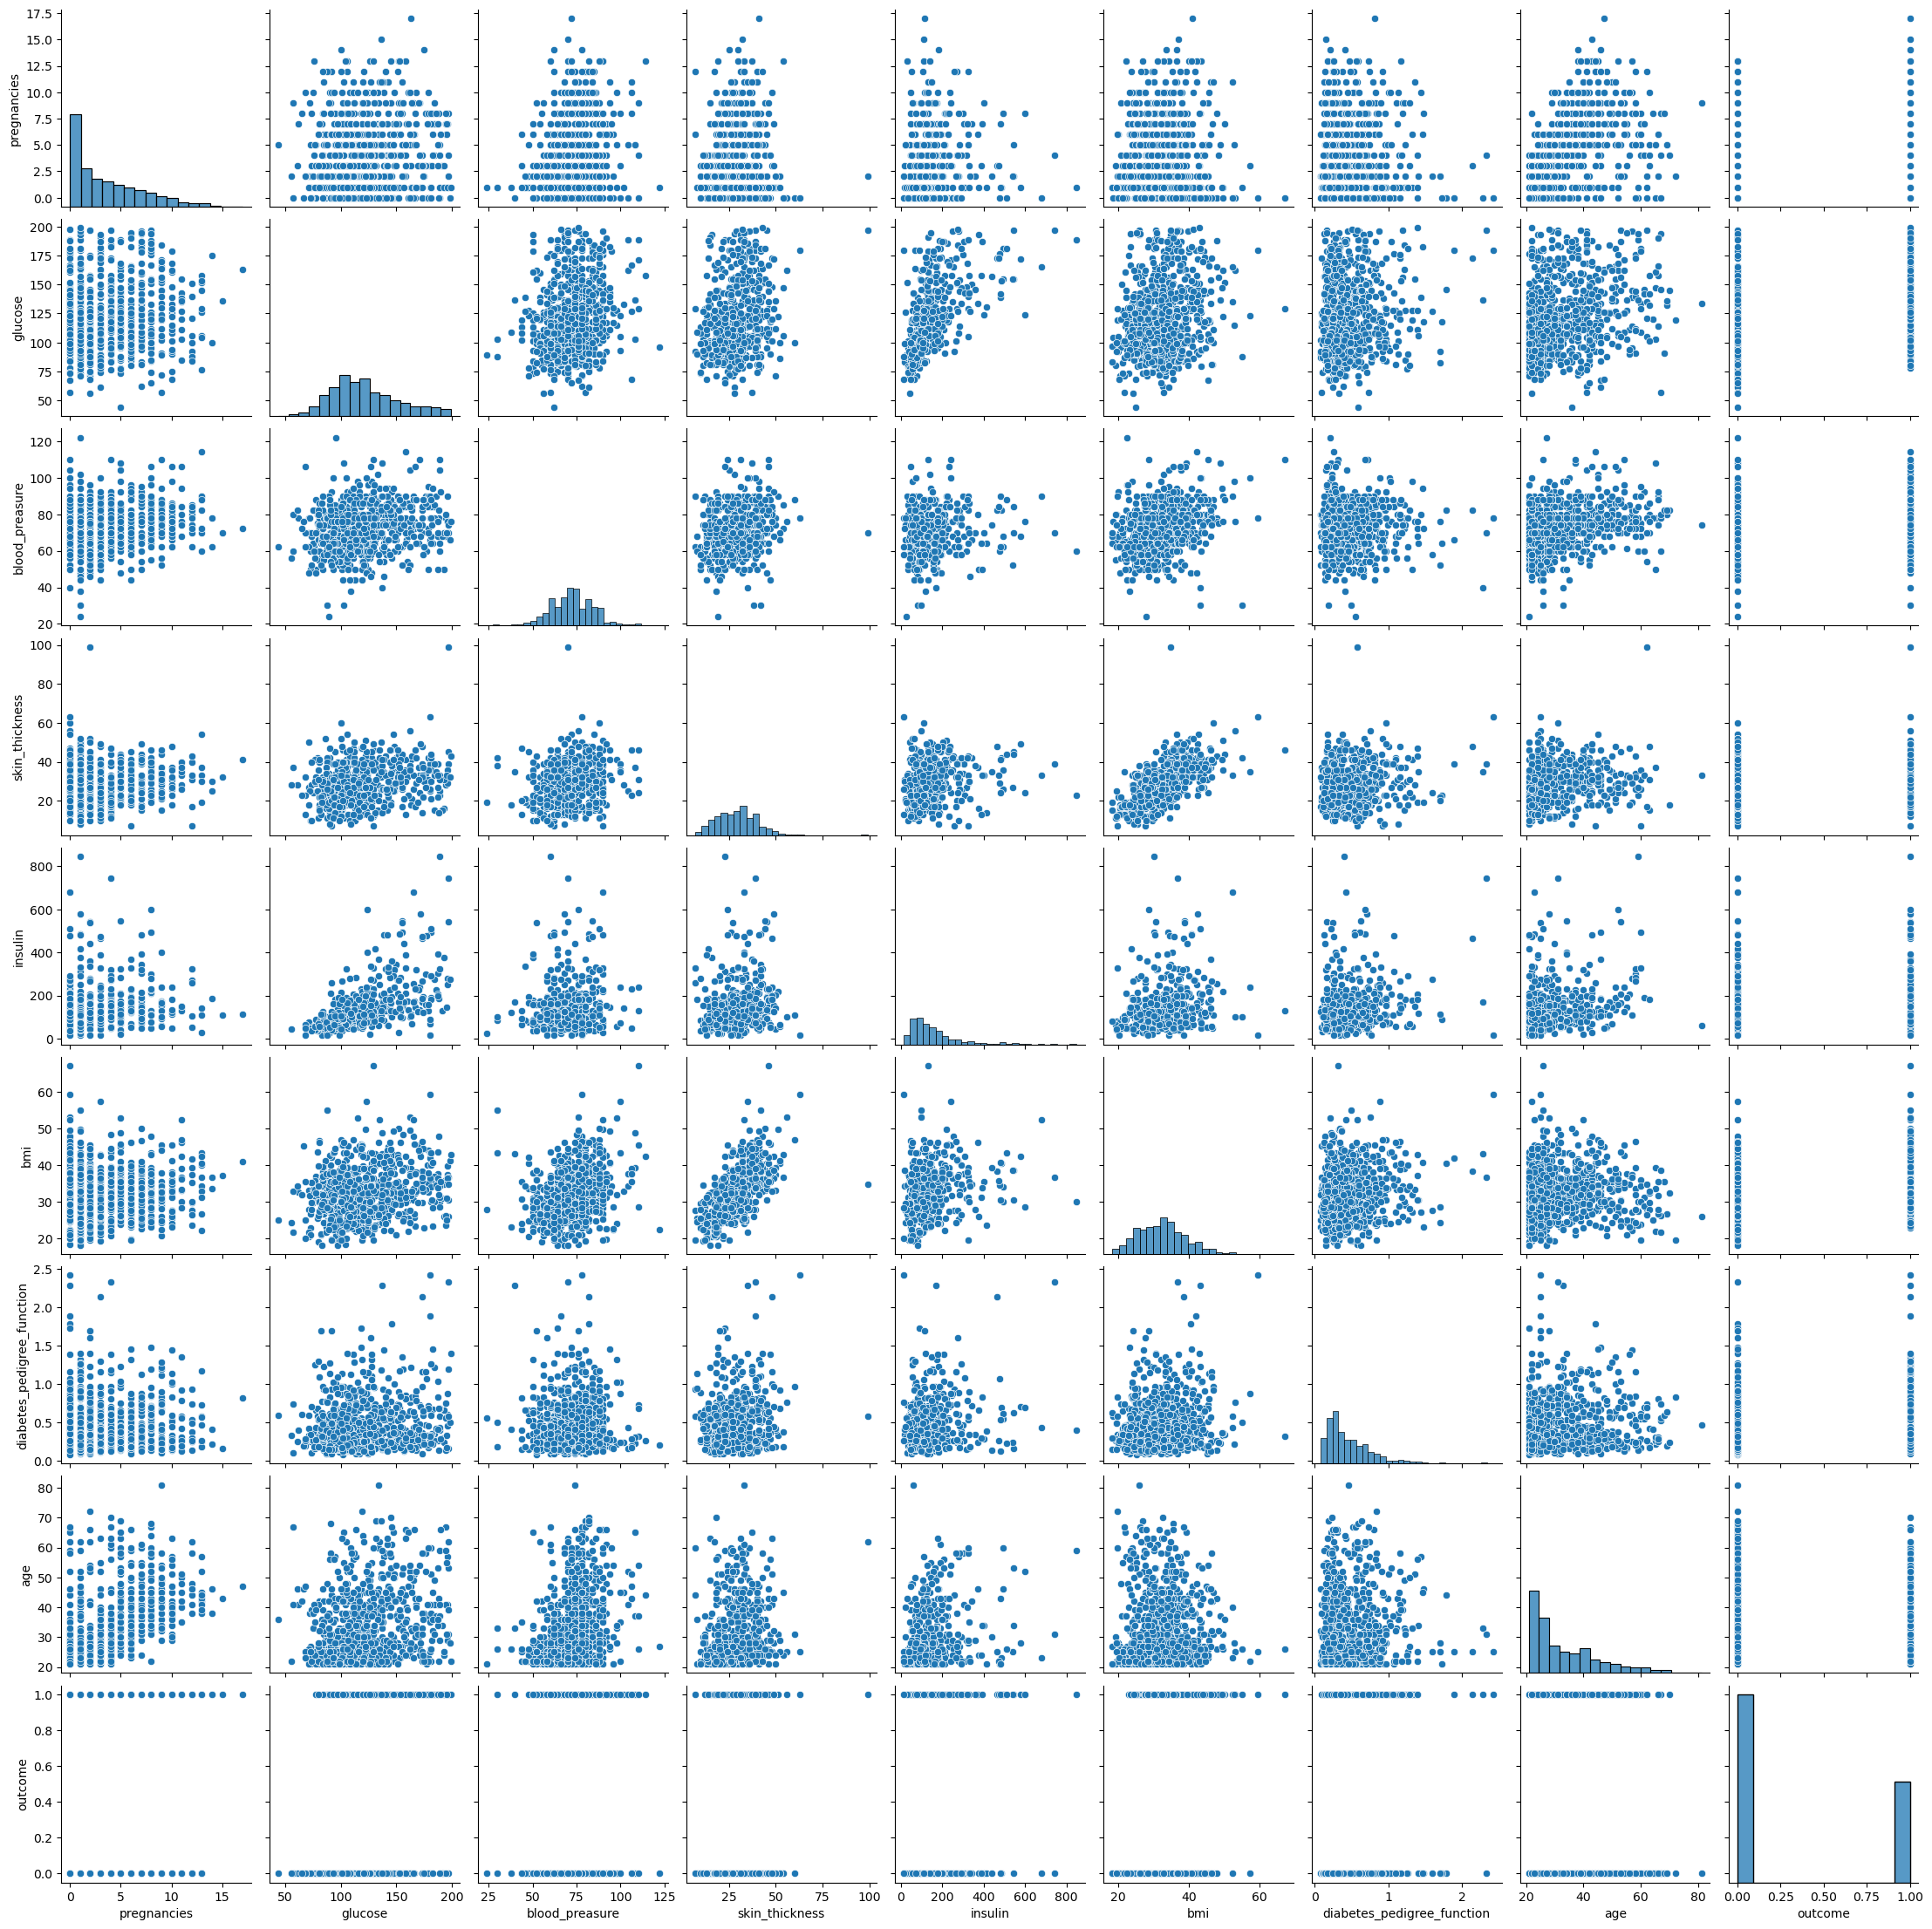

In [36]:
#Construir de un gráfico de relación por pares de variables
sb.pairplot(datos, kind='scatter')
plt.show()

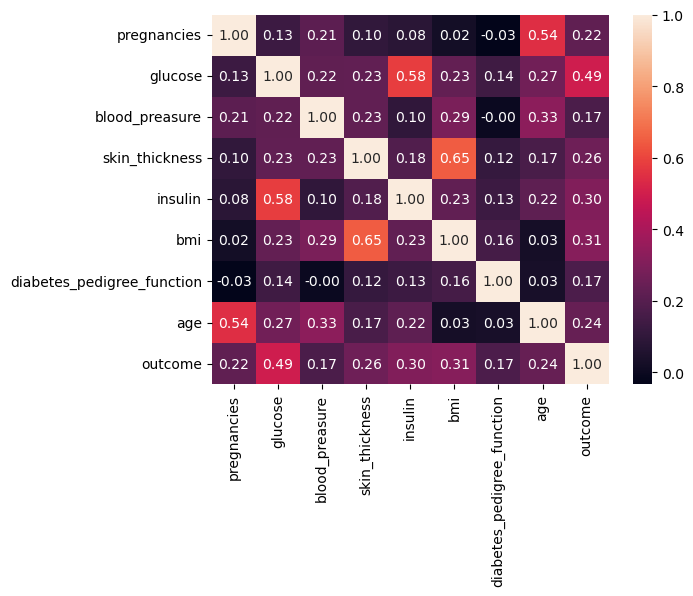

In [39]:
#Cosnruir el mapa de calor de correlación
sb.heatmap(data= datos.corr(), annot=True, fmt = '0.2f')
plt.show()

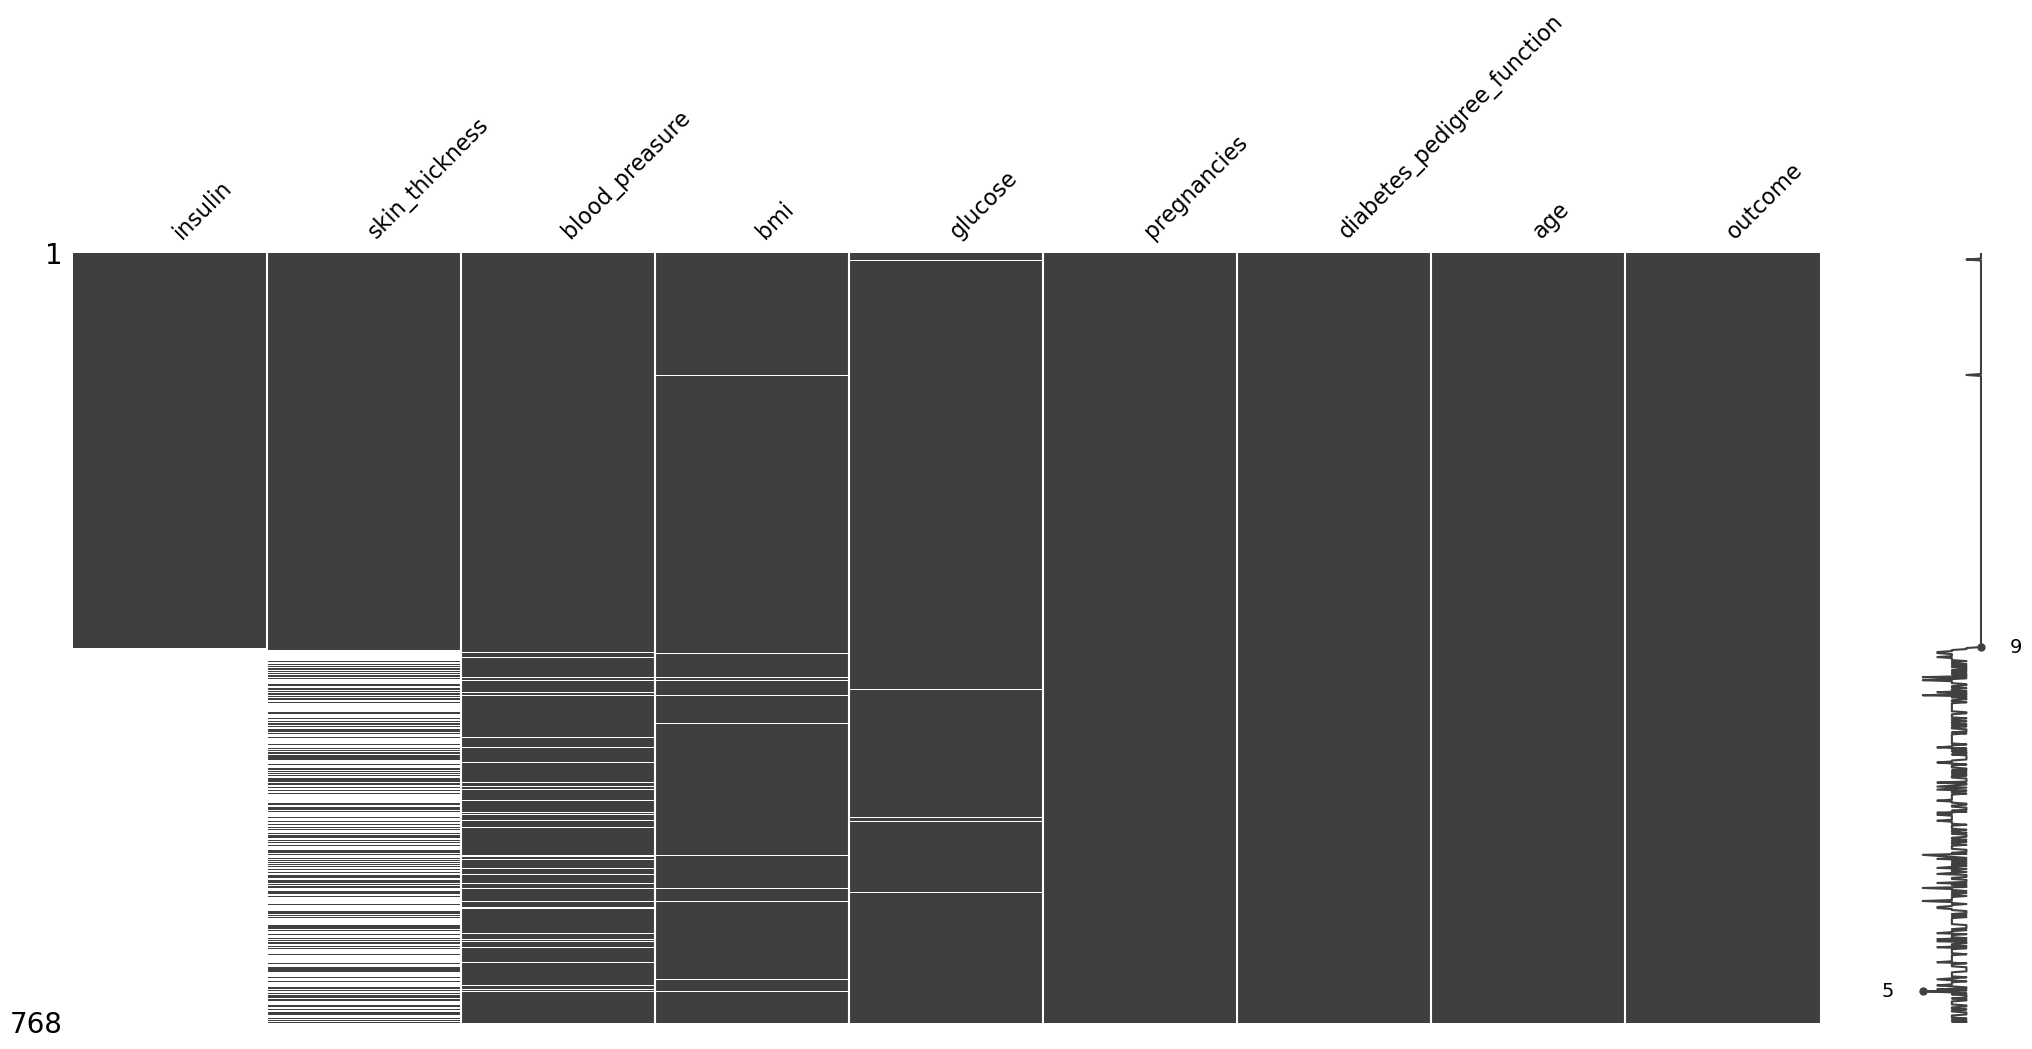

In [40]:
datos.missing.sort_variables_by_missingness().sort_values(by = 'insulin').pipe(msno.matrix)
plt.show()